In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = '/Users/liamanderson/Desktop/Instacart Basket Analysis'

In [4]:
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
crosstab = pd.crosstab(df_all['days_since_prior_order'], df_all['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
# 2. 
## check for PII data

df_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'First Name', 'Surname', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge'],
      dtype='object')

In [8]:
## Some of the data has PII data. This included columns like First name, last name, gender, state, age, marital staus, and income.

In [9]:
# 3.
## create regions based off the states

df_all['State'].value_counts(dropna = False)

State
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [10]:
## Create variables for each of the regions

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [11]:
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [13]:
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
## create columns with the new region variables

df_all.loc[df_all['State'].isin(northeast), 'region'] = 'northeast'

In [15]:
df_all.loc[df_all['State'].isin(midwest), 'region'] = 'midwest'

In [16]:
df_all.loc[df_all['State'].isin(south), 'region'] = 'south'

In [17]:
df_all.loc[df_all['State'].isin(west), 'region'] = 'west'

In [18]:
## check data set to see if it worked

len(df_all['region'])

32404859

In [19]:
df_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'First Name', 'Surname', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge', 'region'],
      dtype='object')

In [20]:
df_all['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [21]:
## check if there is a difference in spending habits using region and spending flag

region_spending_crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)

In [22]:
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,155975,7441350
northeast,108225,5614511
south,209691,10582194
west,160354,8132559


In [23]:
## Figure out how much of each region is high spender

region_spending_crosstab['High spender'] / (region_spending_crosstab['Low spender'] + region_spending_crosstab['High spender'])

region
midwest      0.020530
northeast    0.018911
south        0.019430
west         0.019336
dtype: float64

In [24]:
## The ratio of high spender to low spender is very similar among regions

In [25]:
## 4. add a max order column

df_all['max_order'] = df_all.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/f5/4n0d4d_s69sg2_b5f8nxqp200000gn/T/ipykernel_60498/2282647306.py:3: FutureWarning: The provided callable <function max at 0x10e2b1a80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_all['max_order'] = df_all.groupby(['user_id'])['order_number'].transform(np.max)


In [26]:
df_all['max_order'].head()

0    32
1    32
2     5
3     3
4     3
Name: max_order, dtype: int64

In [27]:
## creat new column that has exclusion flag

df_all.loc[df_all['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [28]:
df_all.loc[df_all['max_order'] >= 5 , 'exclusion_flag'] = 'include'

In [29]:
## Check to make sure that column was added and then check value counts

df_all['exclusion_flag'].head()

0    include
1    include
2    include
3    exclude
4    exclude
Name: exclusion_flag, dtype: object

In [30]:
df_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30964564
exclude     1440295
Name: count, dtype: int64

In [31]:
## Create new dataframe that only includes customers with 5 or more orders

df_all_high_activity = df_all[df_all['exclusion_flag'] == 'include']

In [32]:
df_all_high_activity['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30964564
Name: count, dtype: int64

In [33]:
df_all_high_activity.to_pickle(os.path.join(path,'02 Data' , 'Prepared Data', '4.10_df_high_activity_customers.pkl'))

In [34]:
# 5. 
## Create a profiling variable based on age
## We are going to split up customers by age groups

df_all_high_activity.loc[df_all_high_activity['Age']<=39, 'age_group']='young_adult'

/var/folders/f5/4n0d4d_s69sg2_b5f8nxqp200000gn/T/ipykernel_60498/2761210860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high_activity.loc[df_all_high_activity['Age']<=39, 'age_group']='young_adult'


In [35]:
df_all_high_activity.loc[(df_all_high_activity['Age']>=40)&(df_all_high_activity['Age']<=59), 'age_group']='middle_aged'

In [36]:
df_all_high_activity.loc[df_all_high_activity['Age']>=60, 'age_group']='senior'

In [37]:
df_all_high_activity['age_group'].value_counts(dropna = False)

age_group
young_adult    10665110
senior         10574504
middle_aged     9724950
Name: count, dtype: int64

In [38]:
##  create a profiling variable based on income

df_all_high_activity['income'].head(10)

0      49620
1      49620
2     158302
5      57797
6      34171
7      44856
8     153843
9     153843
10     42573
11     32283
Name: income, dtype: int64

In [39]:
df_all_high_activity.loc[df_all_high_activity['income']<=49999, 'income_group']='low_income'

/var/folders/f5/4n0d4d_s69sg2_b5f8nxqp200000gn/T/ipykernel_60498/1071717171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high_activity.loc[df_all_high_activity['income']<=49999, 'income_group']='low_income'


In [40]:
df_all_high_activity.loc[(df_all_high_activity['income']>=50000)&(df_all_high_activity['income']<=99999), 'income_group']='middle_income'

In [41]:
df_all_high_activity.loc[df_all_high_activity['income']>=100000, 'income_group']='high_income'

In [42]:
df_all_high_activity['income_group'].value_counts(dropna = False)

income_group
high_income      14207402
middle_income    13394608
low_income        3362554
Name: count, dtype: int64

In [43]:
## create a profile based off of number of dependants

df_all_high_activity['n_dependants'].value_counts(dropna = False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [44]:
# make profile for people with and without dependants

df_all_high_activity.loc[df_all_high_activity['n_dependants']==0, 'dependants_flag'] = 'no dependants'

/var/folders/f5/4n0d4d_s69sg2_b5f8nxqp200000gn/T/ipykernel_60498/472422937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high_activity.loc[df_all_high_activity['n_dependants']==0, 'dependants_flag'] = 'no dependants'


In [45]:
df_all_high_activity.loc[df_all_high_activity['n_dependants']>=1, 'dependants_flag'] = 'has dependants'

In [46]:
df_all_high_activity['dependants_flag'].value_counts(dropna = False)

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

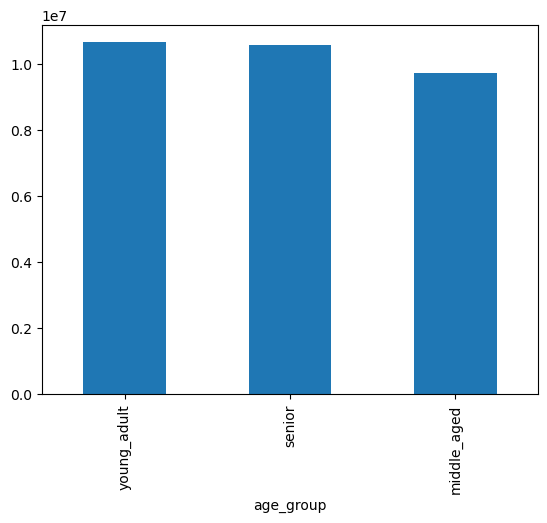

In [47]:
# 6. 
## Create visualization for each of the profiles created
## start with age profile

age_group_value_counts = df_all_high_activity['age_group'].value_counts().plot.bar()

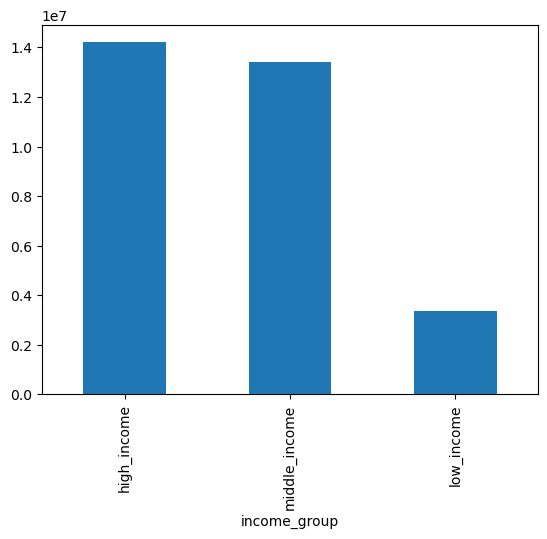

In [48]:
## create bar chart for income groups

income_group_value_counts = df_all_high_activity['income_group'].value_counts().plot.bar()

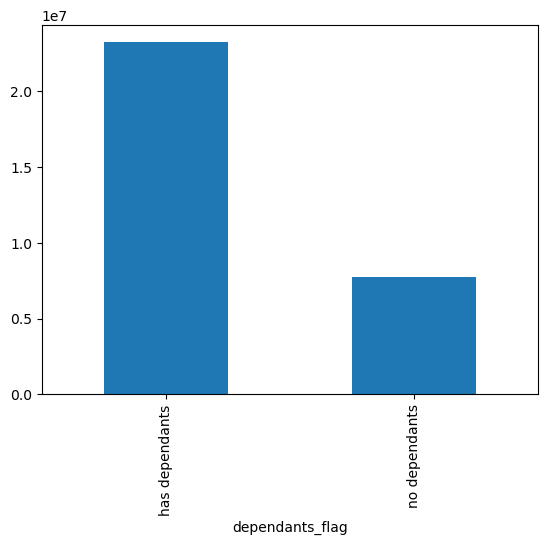

In [49]:
## create bar for number of dependants flag

dependants_flag_value_counts = df_all_high_activity['dependants_flag'].value_counts().plot.bar()

In [50]:
## Export charts

age_group_value_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_value_counts.png'))

In [51]:
income_group_value_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group_value_counts.png'))

In [52]:
dependants_flag_value_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_flag_value_counts.png'))

In [54]:
## kernel breaks down so will create a new notebook. Export updated dataframe

df_all_high_activity.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_all_high_activity.pkl'))